
## Final Project Submission
Please fill out:
* Student name: Justin Grisanti
* Student pace: self-paced
* Scheduled project review date/time: 1/5/2022 @ 2pm
* Instructor name: Claude Fried
* Blog post URL: https://justingrisanti.github.io/predicting_rain_patterns_in_australia

Total Time to Run: approx. 27 minutes

# Section 1: Business Understanding

The purpose of this section is to define the business problem and understand the stakeholders for the work that I am performing. The Bureau of Meteorology is responsible for predicting weather patterns throughout the entire Australian region. According to their website, their forecast accuracy for rain varies much more than their forecasts for temperature and wind. 

According to their analyses, they've underpredicted rainfall each year for the past five years. The goal is to create a classification model that allows the Bureau of Meteorology to improve their predictions of whether or not it will rain the next day. This will allow them to inform the public better so that citizens can prepare accordingly for the possibility of rain. 

The stakeholders of this project are the Bureau of Meteorology and citizens of Australia.

The main purpose of this classification model is predictive, meaning that given charactaristics of rain data on a given day, the model should be able to predict whether it will rain the next day or not. My model is not meant to replace the Bureau of Meteorology's current system of predicting rain for the region of Australia, however, it is meant serve as an input to strengthen their predictions and assumptions, and to reduce the risk of failing to predict that it will rain the next day.

# Section 2: Data Understanding

After scanning the data, we have weather-related information for a period of 12/1/2008 to 6/25/2017—8 years, 6 months and 24 days worth of data.

As shown below, this data has many different weather-related metrics, such as the wind speed, humidity, pressure, whether it was sunny or cloudy, and temperature. These seem like appropriate parameters to run a classification-based model in order to predict whether or not it will rain the next day, and I do not sense any limitations from this data.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, classification_report, log_loss, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, auc, roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from scipy import stats
import seaborn as sns
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data from csv

rain_data = pd.read_csv('data/WeatherAUS.csv')

In [3]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Please see the following column descriptions:

> **MinTemp:** The minimum temperature in degrees celsius

>**MaxTemp:** The maximum temperature in degrees celsius

>**Rainfall:** The amount of rainfall recorded for the day in mm

>**Evaporation:** The so-called Class A pan evaporation (mm) in the 24 hours to 9am

>**Sunshine:** The number of hours of bright sunshine in the day.

>**WindGustDir:** The direction of the strongest wind gust in the 24 hours to midnight

>**WindGustSpeed:** The speed (km/h) of the strongest wind gust in the 24 hours to midnight

>**WindDir9am:** Direction of the wind at 9am

>**WindDir3pm:** Direction of the wind at 3pm

>**WindSpeed9am:** Wind speed (km/hr) averaged over 10 minutes prior to 9am

>**WindSpeed3pm:** Wind speed (km/hr) averaged over 10 minutes prior to 3pm

>**Humidity9am:** Humidity (percent) at 9am

>**Humidity3pm:** Humidity (percent) at 3pm

>**Pressure9am:** Atmospheric pressure (hpa) reduced to mean sea level at 9am

>**Pressure3pm:** Atmospheric pressure (hpa) reduced to mean sea level at 3pm

>**Cloud9am:** Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

>**Cloud3pm:** Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

>**Temp9am:** Temperature (degrees C) at 9am

>**Temp3pm:** Temperature (degrees C) at 3pm

>**RainToday:** Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

>**RainTomorrow:** The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".


In [4]:
# To show all columns and rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
rain_data[rain_data['RainTomorrow'].isna()].head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,4.0,30.0,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,6.0,13.0,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,6.0,11.0,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,9.0,7.0,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,6.0,11.0,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN


In [6]:
rain_data = rain_data.dropna(axis=0, subset = ['RainTomorrow'])

In [7]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [8]:
# Separate target variable from data and complete train-test split

y = rain_data['RainTomorrow']
X = rain_data.drop('RainTomorrow', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Reset index and drop it

X_train.reset_index(inplace=True)
X_train = X_train.drop(columns=['index'],axis=1)
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2009-04-12,Woomera,14.9,30.3,0.0,7.4,10.9,S,33.0,ESE,SW,15.0,11.0,19.0,12.0,1021.1,1017.8,1.0,1.0,22.2,29.7,No
1,2014-12-08,Witchcliffe,14.6,21.5,0.2,NaN,NaN,SSE,46.0,S,SSE,26.0,28.0,65.0,57.0,1012.6,1013.5,NaN,NaN,17.5,18.6,No
2,2015-06-06,SalmonGums,9.0,23.7,0.0,NaN,NaN,W,28.0,WNW,W,11.0,15.0,59.0,45.0,NaN,NaN,NaN,NaN,14.6,23.1,No
3,2014-01-09,Albany,15.3,24.0,0.0,8.2,12.1,NaN,NaN,SSW,SSW,4.0,15.0,63.0,82.0,1018.1,1016.7,3.0,3.0,21.8,21.8,No
4,2014-12-14,Mildura,17.3,37.5,0.0,8.6,11.4,N,39.0,NE,NW,9.0,15.0,26.0,12.0,1009.6,1006.2,7.0,4.0,23.8,35.7,No


In [10]:
# Reset index and drop it

X_test.reset_index(inplace=True)
X_test = X_test.drop(columns=['index'],axis=1)
X_test.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2016-06-09,Ballarat,7.1,13.0,8.8,NaN,NaN,N,41.0,N,WNW,24.0,22.0,100.0,98.0,1001.7,1005.4,8.0,8.0,8.6,11.5,Yes
1,2009-10-24,Walpole,13.2,18.3,0.0,NaN,NaN,E,48.0,ESE,ESE,24.0,20.0,73.0,73.0,1027.6,1023.8,NaN,NaN,14.2,17.0,No
2,2015-09-21,PerthAirport,9.2,22.7,0.0,5.0,11.1,ENE,52.0,ENE,ESE,26.0,20.0,45.0,25.0,1030.1,1025.9,0.0,0.0,15.1,22.5,No
3,2011-12-06,Cobar,15.3,26.1,0.0,10.4,NaN,E,44.0,E,NE,24.0,19.0,48.0,40.0,1013.2,1009.8,7.0,7.0,17.5,24.3,No
4,2014-03-15,Sale,11.9,31.8,0.0,5.0,4.1,NW,72.0,E,N,6.0,19.0,89.0,25.0,1006.7,1001.0,7.0,6.0,16.2,27.4,No


In [11]:
y_train = y_train.replace('Yes', 1.0)
y_train = y_train.replace('No', 0.0)
y_test = y_test.replace('Yes', 1.0)
y_test = y_test.replace('No', 0.0)

In [12]:
# Inspect Target Variable

y_train.value_counts(normalize=True)

0.0    0.775412
1.0    0.224588
Name: RainTomorrow, dtype: float64

In [13]:
# Ensure we get a fair spread of data across the country

X_train['Location'].value_counts()

Canberra            2578
Sydney              2429
Hobart              2416
Perth               2408
Brisbane            2401
Darwin              2382
Adelaide            2329
Tuggeranong         2298
Mildura             2295
Bendigo             2279
Launceston          2279
PerthAirport        2269
Woomera             2266
Ballarat            2262
Albany              2255
MountGambier        2254
Townsville          2248
CoffsHarbour        2247
MelbourneAirport    2246
Watsonia            2243
Sale                2241
Witchcliffe         2240
GoldCoast           2240
AliceSprings        2237
WaggaWagga          2236
Portland            2236
NorfolkIsland       2236
Cobar               2236
Albury              2234
Penrith             2233
Cairns              2232
BadgerysCreek       2232
Newcastle           2229
SydneyAirport       2224
Nuriootpa           2224
Wollongong          2213
SalmonGums          2206
Richmond            2201
Dartmoor            2200
MountGinini         2192


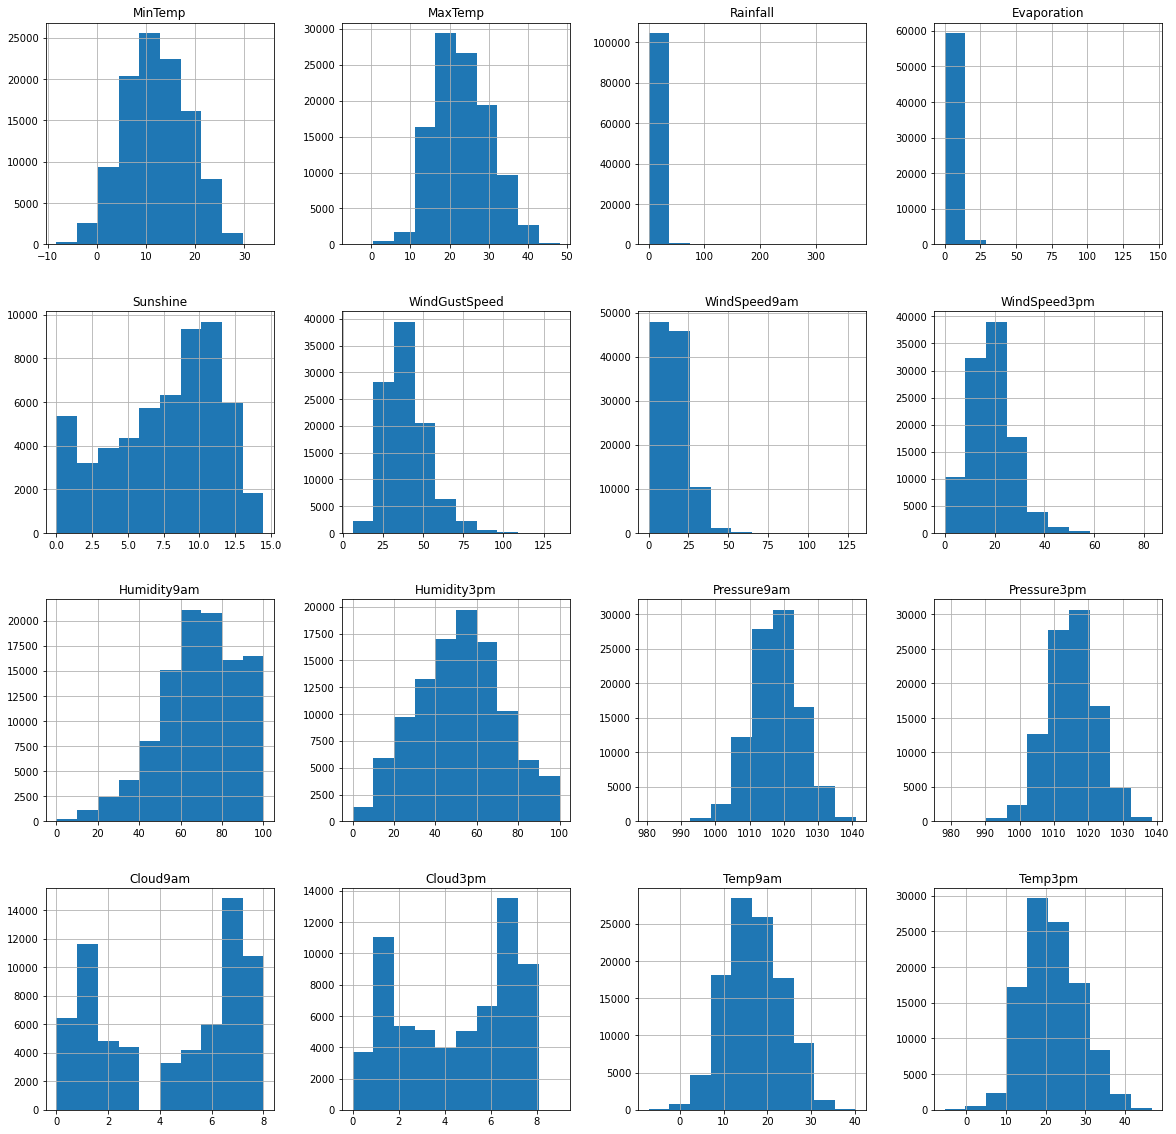

In [14]:
# Plot each column in a histogram to see what type of distribution there is when imputing
columns_with_nulls = X_train.drop(['Location','Date'], axis=1)
columns_with_nulls.hist(figsize=(20,20))
plt.savefig('Visualizations/ColumnsHist.png', bbox_inches = 'tight')

In [15]:
X_train.info(1, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106644 entries, 0 to 106643
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           106644 non-null  object 
 1   Location       106644 non-null  object 
 2   MinTemp        106150 non-null  float64
 3   MaxTemp        106387 non-null  float64
 4   Rainfall       105540 non-null  float64
 5   Evaporation    60909 non-null   float64
 6   Sunshine       55677 non-null   float64
 7   WindGustDir    99665 non-null   object 
 8   WindGustSpeed  99715 non-null   float64
 9   WindDir9am     99120 non-null   object 
 10  WindDir3pm     103822 non-null  object 
 11  WindSpeed9am   105646 non-null  float64
 12  WindSpeed3pm   104681 non-null  float64
 13  Humidity9am    105326 non-null  float64
 14  Humidity3pm    103917 non-null  float64
 15  Pressure9am    96098 non-null   float64
 16  Pressure3pm    96123 non-null   float64
 17  Cloud9am       66285 non-null

As we can see, Evaporation, Sunshine, and cloud data all have a large amount of nulls. Let's take a deeper look into these variables.

In [16]:
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2009-04-12,Woomera,14.9,30.3,0.0,7.4,10.9,S,33.0,ESE,SW,15.0,11.0,19.0,12.0,1021.1,1017.8,1.0,1.0,22.2,29.7,No
1,2014-12-08,Witchcliffe,14.6,21.5,0.2,NaN,NaN,SSE,46.0,S,SSE,26.0,28.0,65.0,57.0,1012.6,1013.5,NaN,NaN,17.5,18.6,No
2,2015-06-06,SalmonGums,9.0,23.7,0.0,NaN,NaN,W,28.0,WNW,W,11.0,15.0,59.0,45.0,NaN,NaN,NaN,NaN,14.6,23.1,No
3,2014-01-09,Albany,15.3,24.0,0.0,8.2,12.1,NaN,NaN,SSW,SSW,4.0,15.0,63.0,82.0,1018.1,1016.7,3.0,3.0,21.8,21.8,No
4,2014-12-14,Mildura,17.3,37.5,0.0,8.6,11.4,N,39.0,NE,NW,9.0,15.0,26.0,12.0,1009.6,1006.2,7.0,4.0,23.8,35.7,No


The following code is to create meaningful information about our null values, so that we can impute them in a more educated manner. 

In [17]:
# Dropping NAs to obtain distribution for data that isn't NA

rain_data_cloud_dropna = X_train.dropna(axis=0, subset=['Cloud3pm','Cloud9am'])

In [18]:
# Dropping NAs to obtain distribution for data that isn't NA

rain_data_sunshine_dropna = X_train.dropna(axis=0, subset=['Sunshine'])

In [19]:
# Checking null sunshine data against rain data to see what the population looks like

rain_data_sunshine_nulls = X_train[X_train['Sunshine'].isna()]
rain_data_sunshine_nulls['RainToday'].value_counts()

No     39031
Yes    11143
Name: RainToday, dtype: int64

In [20]:
# Removing nulls from sunshine data and biforcating the population to get means for sunshine when it rains vs not.

sunshine_when_rain = rain_data_sunshine_dropna[rain_data_sunshine_dropna['RainToday']=="Yes"]
sunshine_no_rain = rain_data_sunshine_dropna[rain_data_sunshine_dropna['RainToday']=="No"]

In [21]:
# Checking evaporation mean when sunshine is greater than zero

evaporation_test = X_train.loc[X_train['Sunshine']>0.0,'Evaporation']

In [22]:
# Checking the mean of cloud data when it doesn't rain and humidity is high/low 
# (Population is not normal without humidity check)

cloud9_no_rain_lower_humidity = X_train.loc[(rain_data['RainToday']=='No') & (X_train['Humidity9am']<=70.0),'Cloud9am']
cloud9_no_rain_higher_humidity = X_train.loc[(X_train['RainToday']=='No') & (X_train['Humidity9am']>=70.0),'Cloud9am']
cloud3_no_rain_lower_humidity = X_train.loc[(X_train['RainToday']=='No') & (X_train['Humidity3pm']<=70.0),'Cloud3pm']
cloud3_no_rain_higher_humidity = X_train.loc[(X_train['RainToday']=='No') & (X_train['Humidity3pm']>=70.0),'Cloud3pm']

In [23]:
# Checking the mean of cloud data when it does rain

cloud9_rain = X_train.loc[X_train['RainToday']=='Yes','Cloud9am']
cloud3_rain = X_train.loc[X_train['RainToday']=='Yes','Cloud3pm']

In [24]:
# Checking null data to see how many records have both null cloud data and sunshine data.

test = []

for index in range(0,106643,1):
    if pd.isna(X_train['Cloud3pm'].loc[index]) and pd.isna(X_train['Cloud9am'].loc[index]):
        if pd.notna(X_train['Sunshine'].loc[index]):
            test.append('Sunshine')
        elif pd.isna(X_train['Sunshine'].loc[index]):
            test.append('Neither')
        else:
            pass
    elif pd.notna(X_train['Cloud3pm'].loc[index]) or pd.notna(X_train['Cloud9am'].loc[index]):
        if pd.notna(X_train['Sunshine'].loc[index]):
            test.append('Both')
        elif pd.isna(X_train['Sunshine'].loc[index]):
            test.append('Clouds')
        else:
            pass
    else:
        pass

In [25]:
print("There are " + str(test.count('Sunshine')) + " records of sunshine data with no cloud data.")
print("There are " + str(test.count('Clouds')) + " records of cloud data with no sunshine data.")
print("There are " + str(test.count('Neither')) + " records of neither sunshine or cloud data.")
print("There are " + str(test.count('Both')) + " records of both sunshine and cloud data.")

There are 5580 records of sunshine data with no cloud data.
There are 19220 records of cloud data with no sunshine data.
There are 31746 records of neither sunshine or cloud data.
There are 50097 records of both sunshine and cloud data.


In [26]:
test_data = {'Sunshine data with Cloud Nulls': 8258, 'Cloud Data with Sunshine Nulls': 26349, 'Both Null': 45486, 'Neither Null': 67367}

In [27]:
# Checking the records to see the relationship between cloud data and sunshine data

test2 = []

for index in range(0,106643,1):
    if X_train['Cloud3pm'].loc[index]== 0  or X_train['Cloud9am'].loc[index]==0:
        if X_train['Sunshine'].loc[index] != 0:
            test2.append('Sunshine')
        elif X_train['Sunshine'].loc[index]==0:
            test2.append('Neither')
        else:
            pass
    elif X_train['Cloud3pm'].loc[index]!=0 or X_train['Cloud9am'].loc[index]!=0:
        if X_train['Sunshine'].loc[index]!=0:
            test2.append('Both')
        elif X_train['Sunshine'].loc[index]==0:
            test2.append('Clouds')
        else:
            pass
    else:
        pass

In [28]:
print("There are " + str(test2.count('Sunshine')) + " records of sunshine data with 0 cloud coverage.")
print("There are " + str(test2.count('Clouds')) + " records of cloud data with 0 sunshine hours.")
print("There are " + str(test2.count('Neither')) + " records of no sunshine or cloud coverage.")
print("There are " + str(test2.count('Both')) + " records of sunshine and cloud coverage.")

There are 7701 records of sunshine data with 0 cloud coverage.
There are 1712 records of cloud data with 0 sunshine hours.
There are 4 records of no sunshine or cloud coverage.
There are 97226 records of sunshine and cloud coverage.


In [29]:
test2_data = {'Sunshine with 0 Clouds': 10350, 'Clouds with 0 sunshine': 2355, 'Neither': 4, 'Both': 139839}

In [30]:
X_train['RainToday'].value_counts(normalize=True)

No     0.775687
Yes    0.224313
Name: RainToday, dtype: float64

In [31]:
rain_data_today = {'Did Not Rain':113580,'Rained':31880}

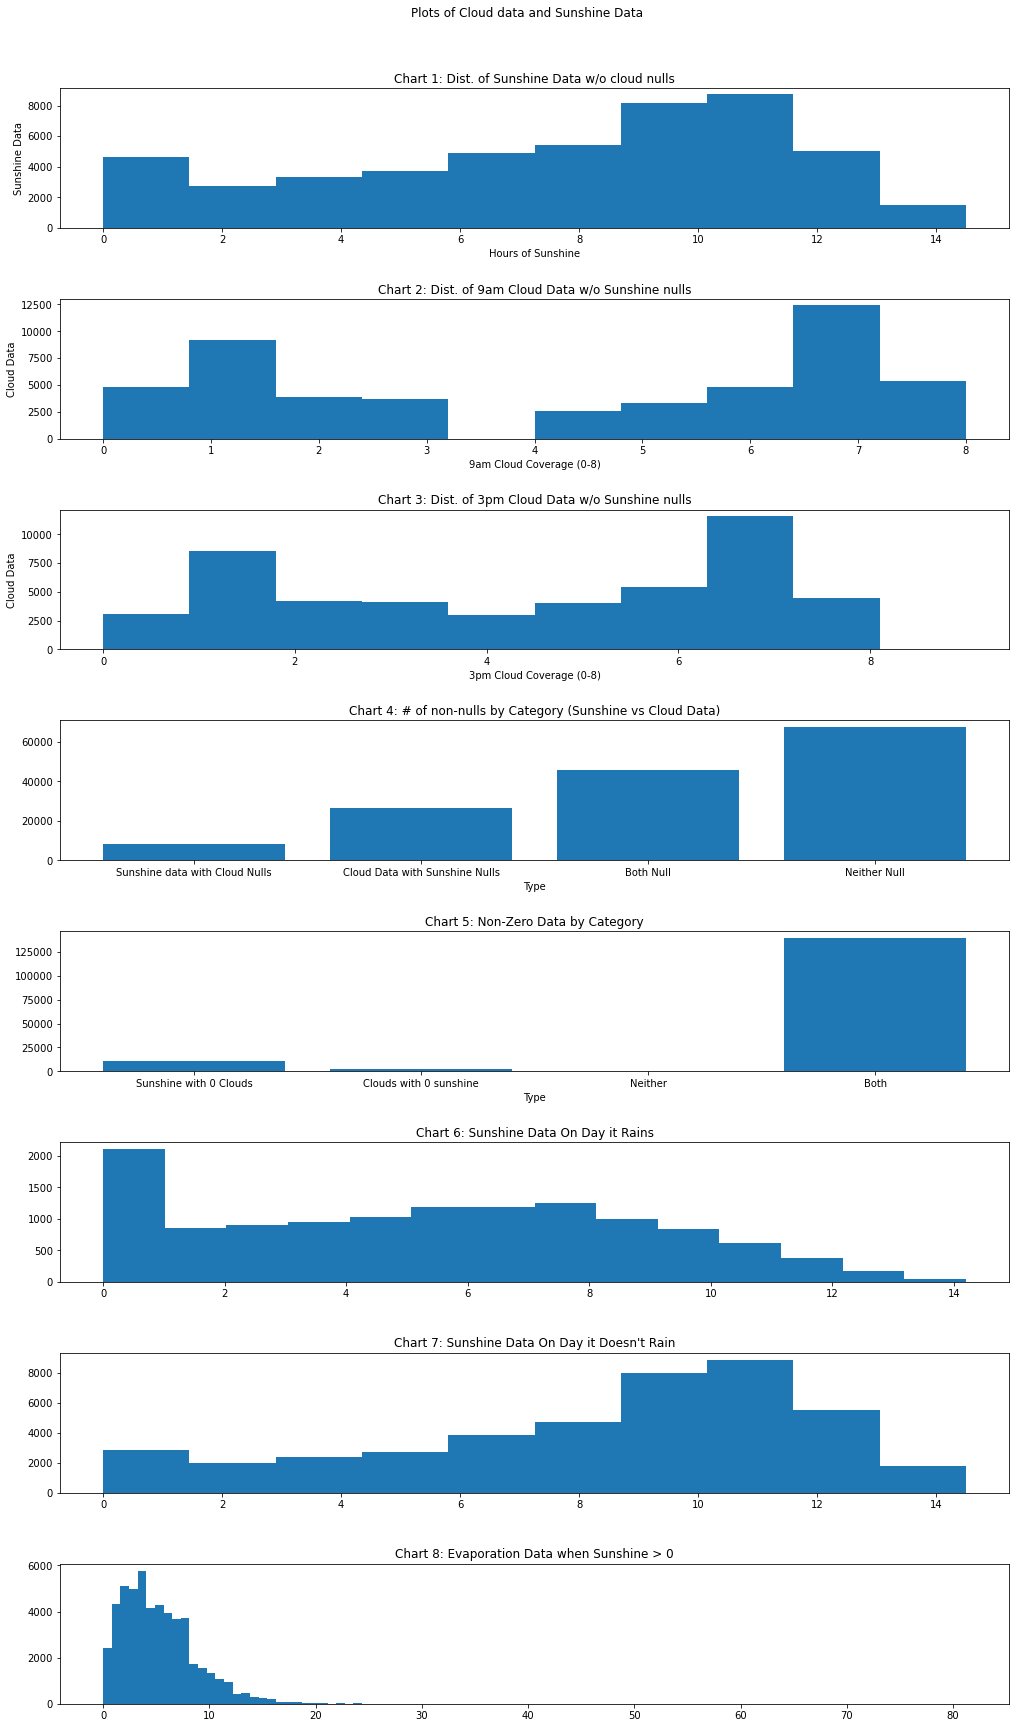

In [32]:
# Create subplot for all of our tests/findings

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1, figsize=(15,25))
fig.suptitle('Plots of Cloud data and Sunshine Data')
fig.tight_layout(pad=5.0)

# This is a distribution for sunshine data that eliminates cloud nulls.
ax1.set_title('Chart 1: Dist. of Sunshine Data w/o cloud nulls')
ax1.hist(rain_data_cloud_dropna['Sunshine'])
ax1.set_xlabel('Hours of Sunshine')
ax1.set_ylabel('Sunshine Data')

# This is a distribution for cloud data that eliminates sunshine nulls. It is not normally distributed so it is 
# hard to impute these values without further biforcation.
ax2.set_title('Chart 2: Dist. of 9am Cloud Data w/o Sunshine nulls')
ax2.hist(rain_data_sunshine_dropna['Cloud9am'])
ax2.set_xlabel('9am Cloud Coverage (0-8)')
ax2.set_ylabel('Cloud Data')

# This is a distribution for cloud data that eliminates sunshine nulls. It is not normally distributed so it is 
# hard to impute these values without further biforcation.
ax3.set_title('Chart 3: Dist. of 3pm Cloud Data w/o Sunshine nulls')
ax3.hist(rain_data_sunshine_dropna['Cloud3pm'])
ax3.set_xlabel('3pm Cloud Coverage (0-8)')
ax3.set_ylabel('Cloud Data')

# Here we plot the population of nulls and their relationships. Perhaps there is a relationship between 
# clouds and sunshine that we can impute. When both records are null, this requires more information.
ax4.set_title('Chart 4: # of non-nulls by Category (Sunshine vs Cloud Data)')
ax4.bar(test_data.keys(),test_data.values())
ax4.set_xlabel('Type')

# Checking the data for zeros.
ax5.set_title('Chart 5: Non-Zero Data by Category')
ax5.bar(test2_data.keys(),test2_data.values())
ax5.set_xlabel('Type')

# Here we find the distribution for days it does rain, and the relevant mean.
ax6.set_title('Chart 6: Sunshine Data On Day it Rains')
ax6.hist(sunshine_when_rain['Sunshine'],bins=14)

# Here we find the distribution for days it doesn't rain, and the relevant mean.
ax7.set_title("Chart 7: Sunshine Data On Day it Doesn't Rain")
ax7.hist(sunshine_no_rain['Sunshine'])

# Here is the distribution for evaporation when sunshine is greater than zero.
ax8.set_title("Chart 8: Evaporation Data when Sunshine > 0")
ax8.hist(evaporation_test,bins=100)
plt.savefig('Visualizations/Subplot1.png', bbox_inches = 'tight')
plt.show()

Here are the actionable insights gained from the charts above:

* **Chart 1**: For Sunshine Data overall and with cloud nulls filtered out, it appears to be normally distributed with a slight skew to the left. There are also many zeroes, which can be explained by rainy days.


* **Chart 2 and 3**: For Cloud Data overall and with Sunshine nulls removed, the data appears to be hump shaped, with one large hump at a 1 on the scale, and another large hump at a 7 on the scale. 


* **Chart 4**: This chart is designed to look at the overall null population, to further understand what data we will need to impute. For our cloud data with sunshine nulls, I would recommend looking further into the rain data to determine how we should handle imputing sunshine values. For sunshine data with cloud nulls, I will impute based off of both the humps; if it rained, I will use the 7 hump, if it did not rain, I will use the 1 hump. If both are null, I will have to use only rain data to determine how I would like to handle these values.


* **Chart 5**: I made this chart to see situations where there are clouds with 0 sunshine, and sunshine with 0 clouds. These values appear to be minimal.


* **Chart 6 and 7**: I created charts here to see how many hours of sunshine there are when it rains, and when it doesn't rain. This could help us biforcate our population of sunshine data so that I am not imputing the mean onto data that doesn't represent the mean.

* **Chart 8**: This shows evaporation data when Sunshine > 0. We can impute the mean here onto our evaporation nulls.


We need to dive deeper into cloud data in order to figure out how to replace nulls. Please see graphs below for more details about our cloud data:

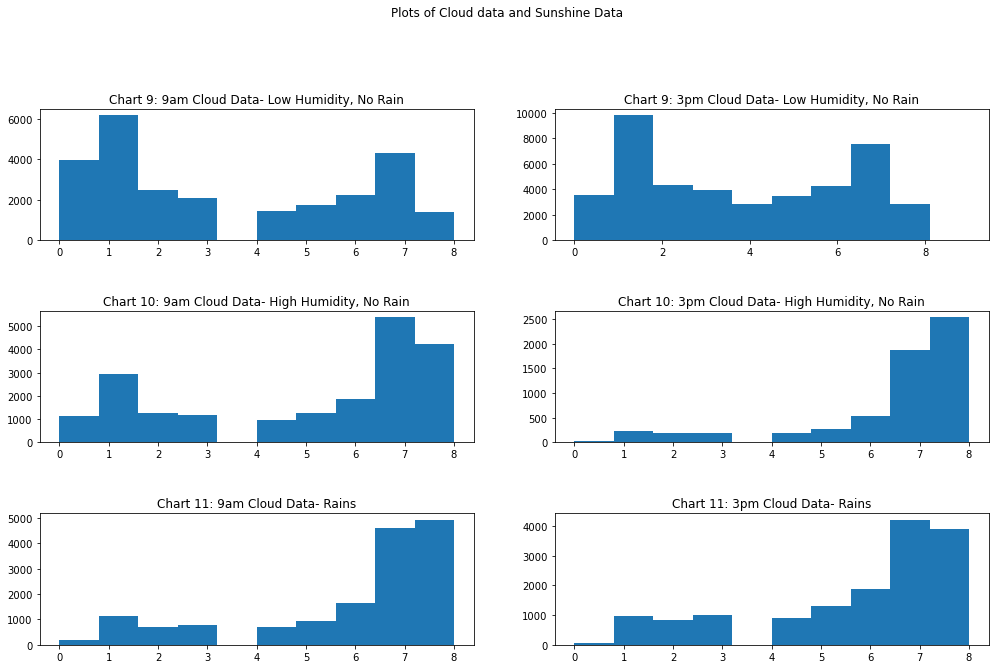

In [33]:
# Now I am going to make a subplot looking into the results of our cloud tests.

fig, ((ax1, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
fig.suptitle('Plots of Cloud data and Sunshine Data')
fig.tight_layout(pad=5.0)

# This is a graph for our cloud data when there is low humidity and it does not rain
ax1.set_title('Chart 9: 9am Cloud Data- Low Humidity, No Rain')
ax1.hist(cloud9_no_rain_lower_humidity)

# This is a graph for our cloud data when there is high humidity and it does not rain
ax2.set_title('Chart 10: 9am Cloud Data- High Humidity, No Rain')
ax2.hist(cloud9_no_rain_higher_humidity)

# This is a graph for our cloud data when it does rain.
ax3.set_title('Chart 11: 9am Cloud Data- Rains')
ax3.hist(cloud9_rain)

# This is a graph for our cloud data when there is low humidity and it does not rain
ax4.set_title('Chart 9: 3pm Cloud Data- Low Humidity, No Rain')
ax4.hist(cloud3_no_rain_lower_humidity)

# This is a graph for our cloud data when there is high humidity and it does not rain
ax5.set_title('Chart 10: 3pm Cloud Data- High Humidity, No Rain')
ax5.hist(cloud3_no_rain_higher_humidity)

# This is a graph for our cloud data when it does rain.
ax6.set_title('Chart 11: 3pm Cloud Data- Rains')
ax6.hist(cloud3_rain)

plt.savefig('Visualizations/Subplot2.png', bbox_inches = 'tight')

Let's breakdown our Cloud data:

* **Chart 9**: As we can see here, in our data when it doesn't rain and humidity is less than 70%, our Cloud data has a mean closer to 1. I will fill the nulls meeting this criteria using a lower cloud coverage.

* **Chart 10**: As we can see here, in our data when it doesn't rain and humidity is greater than 70%, our Cloud data has a mean closer to 7 or 8. I will fill the nulls meeting this criteria using a higher cloud coverage.

* **Chart 11**: As we can see here, in our data when it does rain, our Cloud data has a mean closer to 7 or 8. I will fill the nulls meeting this criteria using a higher cloud coverage.

Now that I have an understanding of the data, I will perform the train/test split, and begin imputing these null values.

# Section 3: Data Preparation

Before imputing my data, I am going to create numeric columns for our categorical fields using OneHotEncoding.

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106644 entries, 0 to 106643
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           106644 non-null  object 
 1   Location       106644 non-null  object 
 2   MinTemp        106150 non-null  float64
 3   MaxTemp        106387 non-null  float64
 4   Rainfall       105540 non-null  float64
 5   Evaporation    60909 non-null   float64
 6   Sunshine       55677 non-null   float64
 7   WindGustDir    99665 non-null   object 
 8   WindGustSpeed  99715 non-null   float64
 9   WindDir9am     99120 non-null   object 
 10  WindDir3pm     103822 non-null  object 
 11  WindSpeed9am   105646 non-null  float64
 12  WindSpeed3pm   104681 non-null  float64
 13  Humidity9am    105326 non-null  float64
 14  Humidity3pm    103917 non-null  float64
 15  Pressure9am    96098 non-null   float64
 16  Pressure3pm    96123 non-null   float64
 17  Cloud9am       66285 non-null

In [35]:
X_train = X_train.drop(['Date'],axis=1)

In [36]:
# Impute sunshine data based off of our findings from above

X_train['Sunshine'] = np.where(((X_train['Sunshine'].isna()) & (X_train['RainToday'] == 1.0)), 0.0, X_train["Sunshine"])
X_train['Sunshine'] = np.where(((X_train['Sunshine'].isna()) & (X_train['RainToday'] == 0.0)), 11.0, X_train["Sunshine"])

In [37]:
X_train['Sunshine'].isna().any()

True

In [38]:
X_train['Sunshine'].value_counts()

0.0     1716
10.7     815
11.0     812
10.5     779
10.8     771
10.3     750
10.2     732
10.9     732
9.8      726
11.1     708
10.6     708
10.4     705
10.0     704
10.1     704
9.2      698
11.2     686
9.9      667
9.5      647
9.4      639
9.6      629
9.7      617
9.3      605
9.0      565
8.8      558
11.3     557
9.1      555
8.4      548
8.9      526
8.7      525
8.2      522
11.4     515
8.0      505
11.6     491
8.3      480
8.6      468
7.2      463
8.5      462
7.8      457
13.0     448
8.1      448
12.0     446
11.7     431
13.1     425
7.3      423
13.2     421
11.5     420
11.9     418
7.7      418
12.7     418
7.6      417
11.8     414
6.8      411
7.1      408
6.9      406
7.5      403
7.4      401
0.1      399
6.3      398
6.1      396
12.2     394
7.0      388
0.2      388
12.5     383
6.6      380
7.9      370
6.0      366
6.2      366
12.4     365
6.5      364
12.6     363
12.3     359
6.4      356
5.7      356
5.8      353
12.1     353
6.7      343
12.8     342

In [39]:
# Impute zero evaporation when sunshine is zero

X_train['Evaporation'] = np.where(((X_train['Evaporation'].isna()) & (X_train['Sunshine'] == 0.0)), 0.0, X_train["Evaporation"])

In [40]:
evaporation_test.sum()/len(evaporation_test)

5.037441856155372

In [41]:
# Impute mean evaporation when sunshine is not zero

X_train['Evaporation'] = np.where(((X_train['Evaporation'].isna()) & (X_train['Sunshine'] > 0.0)), 5.0, X_train["Evaporation"])

In [42]:
X_train['Evaporation'].isna().any()

True

In [43]:
X_train['Evaporation'].value_counts().head()

5.0    4186
4.0    2494
8.0    1938
2.2    1567
2.0    1494
Name: Evaporation, dtype: int64

In [44]:
print(cloud9_no_rain_lower_humidity.value_counts())
print(cloud9_no_rain_higher_humidity.value_counts())
print(cloud9_rain.value_counts())
print(cloud3_no_rain_lower_humidity.value_counts())
print(cloud3_no_rain_higher_humidity.value_counts())
print(cloud3_rain.value_counts())

1.0    6175
7.0    4297
0.0    3953
2.0    2453
6.0    2237
3.0    2092
5.0    1743
4.0    1422
8.0    1391
Name: Cloud9am, dtype: int64
7.0    5366
8.0    4206
1.0    2952
6.0    1884
5.0    1282
2.0    1261
3.0    1179
0.0    1132
4.0     949
Name: Cloud9am, dtype: int64
8.0    4938
7.0    4617
6.0    1631
1.0    1132
5.0     955
3.0     794
4.0     710
2.0     691
0.0     174
Name: Cloud9am, dtype: int64
1.0    9839
7.0    7523
2.0    4320
6.0    4268
3.0    3943
0.0    3560
5.0    3474
8.0    2850
4.0    2834
9.0       1
Name: Cloud3pm, dtype: int64
8.0    2529
7.0    1878
6.0     540
5.0     282
1.0     223
4.0     199
3.0     187
2.0     184
0.0      31
Name: Cloud3pm, dtype: int64
7.0    4215
8.0    3907
6.0    1865
5.0    1302
3.0     988
1.0     967
4.0     915
2.0     827
0.0      69
Name: Cloud3pm, dtype: int64


In [45]:
# Imputing cloud data based on our findings from section 2

X_train['Cloud9am'] = np.where(((X_train['Cloud9am'].isna()) & (X_train['RainToday'] == 1.0)), 8.0, X_train["Cloud9am"])
X_train['Cloud3pm'] = np.where(((X_train['Cloud3pm'].isna()) & (X_train['RainToday'] == 1.0)), 7.0, X_train["Cloud3pm"])
X_train['Cloud9am'] = np.where(((X_train['Cloud9am'].isna()) & (X_train['RainToday'] == 0.0) & (X_train['Humidity9am']<=70.0)), 1.0, X_train["Cloud9am"])
X_train['Cloud9am'] = np.where(((X_train['Cloud9am'].isna()) & (X_train['RainToday'] == 0.0) & (X_train['Humidity9am']>70.0)), 7.0, X_train["Cloud9am"])
X_train['Cloud3pm'] = np.where(((X_train['Cloud3pm'].isna()) & (X_train['RainToday'] == 0.0) & (X_train['Humidity3pm']<=70.0)), 1.0, X_train["Cloud3pm"])
X_train['Cloud3pm'] = np.where(((X_train['Cloud3pm'].isna()) & (X_train['RainToday'] == 0.0) & (X_train['Humidity3pm']>70.0)), 8.0, X_train["Cloud3pm"])

In [46]:
X_train['Cloud9am'].value_counts()

7.0    14805
1.0    11618
8.0    10767
0.0     6427
6.0     5999
2.0     4847
3.0     4385
5.0     4177
4.0     3260
Name: Cloud9am, dtype: int64

In [47]:
X_train['Cloud3pm'].value_counts()

7.0    13512
1.0    11081
8.0     9328
6.0     6642
2.0     5346
3.0     5126
5.0     5049
4.0     3952
0.0     3720
9.0        1
Name: Cloud3pm, dtype: int64

In [48]:
# Imputing remaining columns based on mean, from our charts in section 2

imputer = SimpleImputer(strategy='most_frequent')
imputer = imputer.fit(X_train)
X_train.iloc[:,:] = imputer.transform(X_train)

In [49]:
categorical_data = X_train[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']]
    
ohe = OneHotEncoder()

# Fit the dummy variables to an array
X = ohe.fit_transform(categorical_data.values).toarray()
y = ohe.get_feature_names()

# To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = y) 
X_train = pd.concat([X_train, dfOneHot], axis=1)

# Dropping the base columns, and to avoid multicollinearity, dropping one of each new dummy column 
X_train = X_train.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','x0_Albany','x0_Penrith','x1_NNE','x2_ESE','x3_ENE','x4_No'], axis=1) 

# Printing to verify 
print(X_train.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     14.9     30.3       0.0          7.4      10.9           33.0   
1     14.6     21.5       0.2          5.0       0.0           46.0   
2      9.0     23.7       0.0          5.0       0.0           28.0   
3     15.3     24.0       0.0          8.2      12.1           35.0   
4     17.3     37.5       0.0          8.6      11.4           39.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          15.0          11.0         19.0         12.0       1021.1   
1          26.0          28.0         65.0         57.0       1012.6   
2          11.0          15.0         59.0         45.0       1017.9   
3           4.0          15.0         63.0         82.0       1018.1   
4           9.0          15.0         26.0         12.0       1009.6   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  x0_Adelaide  x0_Albury  \
0       1017.8       1.0       1.0     22.2     29.7        

In [50]:
# Imputing remaining columns based on mean, from our charts in section 2

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(X_train)
X_train.iloc[:,:] = imputer.transform(X_train)

In [51]:
X_train.info(1, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106644 entries, 0 to 106643
Data columns (total 109 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MinTemp              106644 non-null  float64
 1   MaxTemp              106644 non-null  float64
 2   Rainfall             106644 non-null  float64
 3   Evaporation          106644 non-null  float64
 4   Sunshine             106644 non-null  float64
 5   WindGustSpeed        106644 non-null  float64
 6   WindSpeed9am         106644 non-null  float64
 7   WindSpeed3pm         106644 non-null  float64
 8   Humidity9am          106644 non-null  float64
 9   Humidity3pm          106644 non-null  float64
 10  Pressure9am          106644 non-null  float64
 11  Pressure3pm          106644 non-null  float64
 12  Cloud9am             106644 non-null  float64
 13  Cloud3pm             106644 non-null  float64
 14  Temp9am              106644 non-null  float64
 15  Temp3pm         

In [52]:
y_train.count()

106644

In [53]:
X_test.info(1, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35549 entries, 0 to 35548
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           35549 non-null  object 
 1   Location       35549 non-null  object 
 2   MinTemp        35406 non-null  float64
 3   MaxTemp        35484 non-null  float64
 4   Rainfall       35247 non-null  float64
 5   Evaporation    20441 non-null  float64
 6   Sunshine       18700 non-null  float64
 7   WindGustDir    33198 non-null  object 
 8   WindGustSpeed  33208 non-null  float64
 9   WindDir9am     33060 non-null  object 
 10  WindDir3pm     34593 non-null  object 
 11  WindSpeed9am   35199 non-null  float64
 12  WindSpeed3pm   34882 non-null  float64
 13  Humidity9am    35093 non-null  float64
 14  Humidity3pm    34666 non-null  float64
 15  Pressure9am    32081 non-null  float64
 16  Pressure3pm    32089 non-null  float64
 17  Cloud9am       22251 non-null  float64
 18  Cloud3

In [54]:
X_test.reset_index(inplace=True)

In [55]:
X_test = X_test.drop(columns=['index'],axis=1)

In [56]:
# Performing same imputations as train data

X_test['Sunshine'] = np.where(((X_test['Sunshine'].isna()) & (X_test['RainToday'] == 1.0)), 0.0, X_test["Sunshine"])
X_test['Sunshine'] = np.where(((X_test['Sunshine'].isna()) & (X_test['RainToday'] == 0.0)), 7.0, X_test["Sunshine"])
X_test['Evaporation'] = np.where(((X_test['Evaporation'].isna()) & (X_test['Sunshine'] == 0.0)), 0.0, X_test["Evaporation"])
X_test['Evaporation'] = np.where(((X_test['Evaporation'].isna()) & (X_test['Sunshine'] > 0.0)), 5.0, X_test["Evaporation"])
X_test['Cloud9am'] = np.where(((X_test['Cloud9am'].isna()) & (X_test['RainToday'] == 1.0)), 8.0, X_test["Cloud9am"])
X_test['Cloud3pm'] = np.where(((X_test['Cloud3pm'].isna()) & (X_test['RainToday'] == 1.0)), 7.0, X_test["Cloud3pm"])
X_test['Cloud9am'] = np.where(((X_test['Cloud9am'].isna()) & (X_test['RainToday'] == 0.0) & (X_test['Humidity9am']<=70.0)), 1.0, X_test["Cloud9am"])
X_test['Cloud9am'] = np.where(((X_test['Cloud9am'].isna()) & (X_test['RainToday'] == 0.0) & (X_test['Humidity9am']>70.0)), 7.0, X_test["Cloud9am"])
X_test['Cloud3pm'] = np.where(((X_test['Cloud3pm'].isna()) & (X_test['RainToday'] == 0.0) & (X_test['Humidity3pm']<=70.0)), 1.0, X_test["Cloud3pm"])
X_test['Cloud3pm'] = np.where(((X_test['Cloud3pm'].isna()) & (X_test['RainToday'] == 0.0) & (X_test['Humidity3pm']>70.0)), 8.0, X_test["Cloud3pm"])

In [57]:
# Performing same imputations as train data

imputer = SimpleImputer(strategy='most_frequent')
imputer = imputer.fit(X_test)
X_test.iloc[:,:] = imputer.transform(X_test)

In [58]:
categorical_data = X_test[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']]
    
ohe = OneHotEncoder()

# Fit the dummy variables to an array
X = ohe.fit_transform(categorical_data.values).toarray()
y = ohe.get_feature_names()

# To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = y) 
X_test = pd.concat([X_test, dfOneHot], axis=1)

# Dropping the country column 
X_test = X_test.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','x0_Albany','x0_Penrith','x1_NNE','x2_ESE','x3_ENE','x4_No'], axis=1) 

# Printing to verify 
print(X_test.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0      7.1     13.0       8.8          5.0       0.0           41.0   
1     13.2     18.3       0.0          5.0       0.0           48.0   
2      9.2     22.7       0.0          5.0      11.1           52.0   
3     15.3     26.1       0.0         10.4       0.0           44.0   
4     11.9     31.8       0.0          5.0       4.1           72.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          24.0          22.0        100.0         98.0       1001.7   
1          24.0          20.0         73.0         73.0       1027.6   
2          26.0          20.0         45.0         25.0       1030.1   
3          24.0          19.0         48.0         40.0       1013.2   
4           6.0          19.0         89.0         25.0       1006.7   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  x0_Adelaide  x0_Albury  \
0       1005.4       8.0       8.0      8.6     11.5        

In [59]:
X_test.info(1, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35549 entries, 0 to 35548
Data columns (total 109 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MinTemp              35549 non-null  float64
 1   MaxTemp              35549 non-null  float64
 2   Rainfall             35549 non-null  float64
 3   Evaporation          35549 non-null  float64
 4   Sunshine             35549 non-null  float64
 5   WindGustSpeed        35549 non-null  float64
 6   WindSpeed9am         35549 non-null  float64
 7   WindSpeed3pm         35549 non-null  float64
 8   Humidity9am          35549 non-null  float64
 9   Humidity3pm          35549 non-null  float64
 10  Pressure9am          35549 non-null  float64
 11  Pressure3pm          35549 non-null  float64
 12  Cloud9am             35549 non-null  float64
 13  Cloud3pm             35549 non-null  float64
 14  Temp9am              35549 non-null  float64
 15  Temp3pm              35549 non-null

In [60]:
y_test.count()

35549

# Section 4: Modeling

To begin, I will build a logistic model. After that, I will be building a kNN model and a decision tree model, and will pick the best model from the three. 

The metric I focus on the most will be recall, because if there are false negatives in my model, then it could rain on citizens who expected a dry day. As the Bureau of Meteorology has been underestimating rain over the past five years, we are trying to minimize false negatives as much as possible. 

#### Logistic Regression

In [61]:
# Create a Baseline Model

logreg = LogisticRegression()
model_log = logreg.fit(X_train, y_train)
model_log.score(X_test,y_test)
y_pred_lr = model_log.predict(X_test)

In [62]:
recall_score(y_test,y_pred_lr)

0.4690890739338885

I will now run various models through a Pipeline to see if I can find a combination of parameters to bring down our performance metric.

In [63]:
# Create pipeline

lr_pipeline_1 = Pipeline([('ss', StandardScaler()), 
                              ('lr', LogisticRegression())])

In [64]:
# Create grid using GridSearchCV

lr_grid = [{'lr__random_state':[42],
         'lr__C': [1,1e2,1e3],
         'lr__solver': ['saga','lbfgs']}]

In [65]:
# Create grid using GridSearchCV

lr_gridsearch = GridSearchCV(estimator=lr_pipeline_1, 
                          param_grid=lr_grid, 
                          scoring='recall', 
                          cv=3)

In [66]:
# Re-distributing our population using SMOTE, to account for accuracy bias

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [67]:
y_train_resampled.value_counts()

1.0    82693
0.0    82693
Name: RainTomorrow, dtype: int64

In [68]:
# Fit the training data
lr_gridsearch.fit(X_train_resampled, y_train_resampled)
print(lr_gridsearch.score(X_test, y_test))

0.7717638152914459


In [69]:
# Print best parameters

print(lr_gridsearch.best_params_)

{'lr__C': 100.0, 'lr__random_state': 42, 'lr__solver': 'lbfgs'}


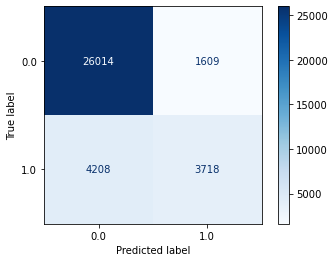

In [70]:
# Create confusion matrix for baseline model 

plot_confusion_matrix(logreg, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.grid(False)
plt.savefig('Visualizations/LogRegBase.png', bbox_inches = 'tight')
plt.show()

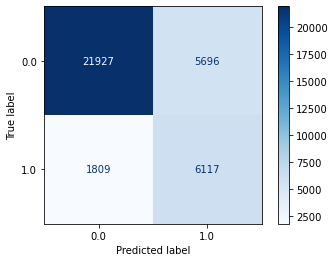

In [71]:
# Create confusion matrix for best model 

plot_confusion_matrix(lr_gridsearch, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.grid(False)
plt.savefig('Visualizations/LogRegBest.png', bbox_inches = 'tight')
plt.show()

#### k-Nearest Neighbors

In [72]:
# Create baseline model

knn_baseline_model = KNeighborsClassifier()
model_knn = knn_baseline_model.fit(X_train, y_train)
model_knn.score(X_test,y_test)
y_pred_knn = model_knn.predict(X_test)

In [73]:
recall_score(y_test,y_pred_knn)

0.5099671965682564

Next, I will build a model using Pipeline and kNN to check score using a set of different parameters:

In [74]:
# Creating 3 different tests using different parameters

knn_pipeline = Pipeline([('ss', StandardScaler()), 
                              ('knn', KNeighborsClassifier())])

In [75]:
# Create grid using GridSearchCV

knn_grid = [{'knn__n_neighbors':[2,5,7,10]}]

In [76]:
# Create grid using GridSearchCV

knn_gridsearch = GridSearchCV(estimator=knn_pipeline, 
                          param_grid=knn_grid, 
                          scoring='recall', 
                          cv=3)

In [77]:
# Fit the training data
knn_gridsearch.fit(X_train_resampled, y_train_resampled)
print(knn_gridsearch.score(X_test, y_test))

0.5425182942215493


In [78]:
print(knn_gridsearch.best_params_)

{'knn__n_neighbors': 5}


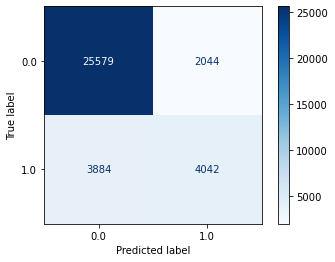

In [79]:
# Create confusion matrix for baseline

plot_confusion_matrix(knn_baseline_model, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.grid(False)
plt.savefig('Visualizations/KNNbaseline.png', bbox_inches = 'tight')
plt.show()

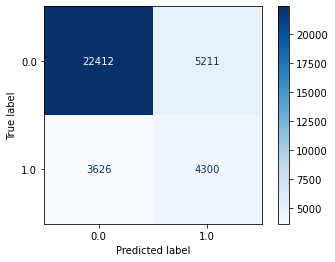

In [80]:
# Create confusion matrix for best

plot_confusion_matrix(knn_gridsearch, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.grid(False)
plt.savefig('Visualizations/KNNbest.png', bbox_inches = 'tight')
plt.show()

As we can see above, our best model seems to cap at a score of around .548. I will now use decision trees and Grid Search CV to see if they generate a stronger model.

**Decision Trees**

In [81]:
# Create a Baseline Model

dt_base = DecisionTreeClassifier()
model_dt = dt_base.fit(X_train, y_train)
model_dt.score(X_test,y_test)
y_pred_dt = model_dt.predict(X_test)

In [82]:
recall_score(y_test,y_pred_dt)

0.5285137522079233

In [83]:
# Create pipeline

dtree_pipeline = Pipeline([('ss', StandardScaler()), 
                              ('dt', DecisionTreeClassifier())])

In [84]:
# Use GridSearchCV to create different models

dt_grid = [{'dt__criterion': ['gini','entropy'], 
         'dt__max_leaf_nodes': [5,10,20,None],
         'dt__max_features': ['auto','sqrt','log2', None],
         'dt__random_state':[42]}]

In [85]:
# Use GridSearchCV to create different models

dt_gridsearch = GridSearchCV(estimator=dtree_pipeline, 
                          param_grid=dt_grid, 
                          scoring='recall', 
                          cv=3)

In [86]:
# Fit model and print

dt_gridsearch.fit(X_train_resampled, y_train_resampled)
print(dt_gridsearch.score(X_test, y_test))

0.6814282109512996


In [87]:
print(dt_gridsearch.best_params_)

{'dt__criterion': 'entropy', 'dt__max_features': 'log2', 'dt__max_leaf_nodes': 5, 'dt__random_state': 42}


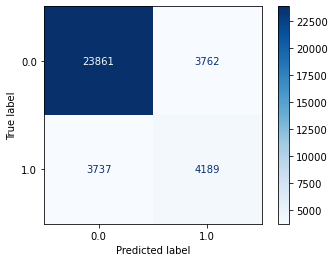

In [88]:
# Create confusion matrix for baseline

cm = plot_confusion_matrix(dt_base, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.grid(False)
plt.savefig('Visualizations/DT.png', bbox_inches = 'tight')
plt.show()

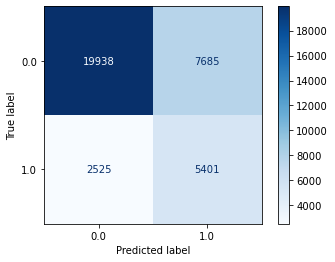

In [89]:
# Create confusion matrix for best

plot_confusion_matrix(dt_gridsearch, X_test, y_test,
                     cmap=plt.cm.Blues, values_format = '.5g')
plt.grid(False)
plt.savefig('Visualizations/DT.png', bbox_inches = 'tight')
plt.show()

As we can see here, the best decision tree model is slightly worse than the logistic regression model, and better than our best kNN model, at a recall score of .68.

# Section 5: Results

### Best Model

The logistic regression model is our best model, at a recall of around .771. Now, I will take a look at the remaining metrics.

In [90]:
# Checking our our train and test data metrics

final_test = lr_gridsearch.predict(X_test)
final_train = lr_gridsearch.predict(X_train_resampled)

print("Training Data Results:\n")
print(classification_report(y_train_resampled, final_train))
print("\nTest Data Results:\n")
print(classification_report(y_test, final_test))

Training Data Results:

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79     82693
         1.0       0.80      0.78      0.79     82693

    accuracy                           0.79    165386
   macro avg       0.79      0.79      0.79    165386
weighted avg       0.79      0.79      0.79    165386


Test Data Results:

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85     27623
         1.0       0.52      0.77      0.62      7926

    accuracy                           0.79     35549
   macro avg       0.72      0.78      0.74     35549
weighted avg       0.83      0.79      0.80     35549




AUC: 0.865517759581673


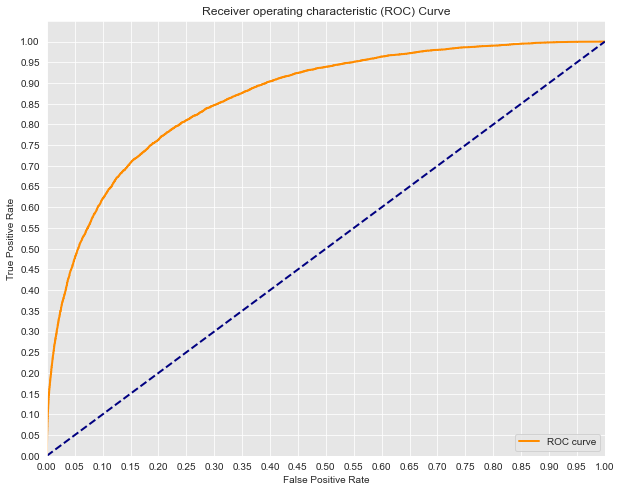

In [91]:
# Creating ROC curve to see effectiveness of model.

y_score = lr_gridsearch.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('\nAUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('Visualizations/AUC.png', bbox_inches = 'tight')
plt.show()

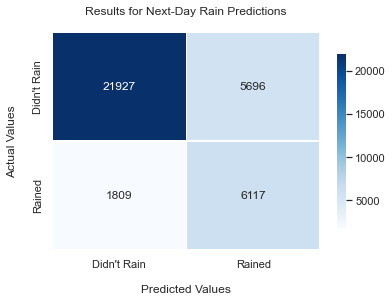

In [92]:
# Create confusion matrix for final model 
lrcm = confusion_matrix(y_test, final_test)
sns.set_context("talk")
sns.set_theme(style='darkgrid')
ax = sns.heatmap(lrcm, annot=True, cmap='Blues',fmt = 'g',linewidth=0.3, cbar_kws={"shrink": .8})

ax.set_title('Results for Next-Day Rain Predictions\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Didn't Rain","Rained"])
ax.yaxis.set_ticklabels(["Didn't Rain","Rained"])
plt.savefig('Visualizations/FinalCM.png', bbox_inches = 'tight')
## Display the visualization of the Confusion Matrix.
plt.show()

Accuracy: This model has 79% accuracy, meaning that it correctly determines that it will rain the next day 79% of the time. As True Negatives account for 77% of our test data, there is a lot of bias within this metric. Therefore, it is best to ignore it in our analysis.

Precision: If our model says that it will rain tomorrow, there between a 52% chance that it is a true positive and will actually rain the next day. If our model says it wont rain tomorrow, there is a 92% chance that it won't rain tomorrow. The weighted average precision of our model is 83%. Our model is way better at predicting when it won't rain than when it will. In the future, we should take steps to try to raise precision.

Recall: Our recall score is the most important aspect of this model. For instances when it actually rained the next day, our model correctly classified that it would rain 77% of the time. For instances when it did not rain the next day, our model correctly predicted that it would not rain 79% of the time. The weighted average recall of our model is 79%. 

Our AUC Score is .86. That means that our classifiers have an 86% true positive rate.